In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 기존 plotnine(ggplot)코드를 pandas와 seaborn으로 변경
# from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium
plt.style.use('ggplot')
# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline
from plotnine import*

In [49]:
from matplotlib import font_manager,rc
font_n = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_n)

In [50]:
shop = pd.read_csv("C:/Users/Lee Jong Ann/Downloads/소상공인시장진흥공단_상가업소정보_201806_01.csv",encoding='cp949')

In [51]:
shop.shape

(476183, 39)

In [52]:
shop.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [25]:
shop['상권업종대분류명'].value_counts()

음식          157467
소매          150740
생활서비스        76022
학문/교육        36113
의료           20646
부동산          17199
관광/여가/오락     13164
숙박            4756
스포츠             76
Name: 상권업종대분류명, dtype: int64

In [26]:
shop['상권업종중분류명'].value_counts()

한식          52719
이/미용/건강     36211
종합소매점       30172
의복의류        27077
유흥주점        19610
            ...  
스포츠/운동         42
유스호스텔          16
운영관리시설         11
부동산관련서비스        4
실외운동시설          2
Name: 상권업종중분류명, Length: 94, dtype: int64

In [28]:
shop['상권업종소분류명'].value_counts()

한식/백반/한정식      34155
여성미용실          21902
커피전문점/카페/다방    18759
부동산중개          16298
일반의류           13499
               ...  
지점토판매              1
학원-기계고시            1
응원기획               1
초상화제작              1
실외야구연습장            1
Name: 상권업종소분류명, Length: 702, dtype: int64

In [34]:
hansik = shop.loc[shop['상권업종소분류명'].str.contains('한식')]
hansik.shape

(34213, 39)

In [35]:
hansik.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [41]:
hansik['시도명'].value_counts()

서울특별시    23769
부산광역시    10444
Name: 시도명, dtype: int64

In [47]:
hansik['시군구명'].unique()

array(['구로구', '서대문구', '광진구', '금천구', '영도구', '노원구', '동작구', '강서구', '부산진구',
       '영등포구', '종로구', '성동구', '중구', '서구', '마포구', '동대문구', '사하구', '송파구',
       '사상구', '강남구', '성북구', '동래구', '양천구', '관악구', '기장군', '용산구', '해운대구',
       '서초구', '은평구', '연제구', '남구', '금정구', '북구', '중랑구', '강북구', '동구', '수영구',
       '강동구', '도봉구'], dtype=object)

In [ ]:
hansik['시군구명'].unique

In [58]:
df_seoul = shop.loc[shop['시도명'] == '서울특별시']

In [60]:
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()


In [61]:
df_31['브랜드명'] = ''

In [63]:
df_31[['상호명','브랜드명']].head()

,상호명,브랜드명
63,배스킨라빈스,
1564,던킨도너츠테크노마트점,
1921,던킨도너츠창동하나로,
1958,던킨도너츠용산민자역사2호,
2459,던킨도너츠,


In [65]:
df_31.loc[df_31['상호명'].str.contains('배스킨'),'브랜드명'] = '배스킨'
df_31.loc[df_31['상호명'].str.contains('던킨도너츠'),'브랜드명'] = '던킨도너츠'

In [66]:
hansik['상권업종중분류명'].value_counts()

한식    34155
부페       58
Name: 상권업종중분류명, dtype: int64

In [67]:
hansik.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [68]:
m = folium.Map(location=[hansik['위도'].mean(),hansik['경도'].mean()],zoom_start=12)

for i in hansik.index[:1000]:
    sub_lat=hansik.loc[i,'위도']
    sub_long=hansik.loc[i,'경도']
    title= hansik.loc[i,'상호명'] + "-" + hansik.loc[i,'도로명주소']
    folium.Marker([sub_lat,sub_long],popup=title).add_to(m)

m
    

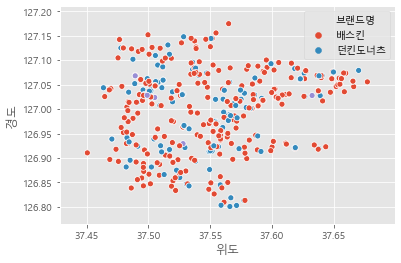

In [69]:
sns.scatterplot(data=df_31,x='위도',y='경도',hue='브랜드명')